# Asymptotic Bode

Goal:
* Express the frequency response of a system defined by a transfer function as piecewise linear funtions.

## Preparations

In [139]:
import numpy as np

from sympy import *
from sympy.physics.control.lti import TransferFunction

from mathprint import *

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 10,
})

Define variables that we are going to use repetitively.
We also need to define specific prpoperties of the variables.

In [140]:
t        = symbols('t'       , real=True)
s        = symbols('s'       , complex=True)
omega    = symbols('omega'   , positive=True)
a, b     = symbols('a b'     , real=True)
zeta     = symbols('zeta'    , positive=True)
omega_n  = symbols('omega_n' , positive=True)

## Asymptotic Bode Plots of Low-Order Transfer Functions

These are the fundamental steps that we must do to plot the frequence response (Bode plot) of a system defined by a transfer function $H(s)$:
* Do substitution: $s = j \omega$
* Compute $H( j \omega )$
* The result is a complex number:
    * Extract the magnitude: $ M = \big| H(j \omega) \big| $
    * Convert the magnitude into dB: $ M_{dB} = 20 \log_{10} M  $
    * Extract the the phase: $ \phi = \angle H(j \omega) $

It is very easy to execute those steps by using a computer. On the other hand, when we simply want to sketch the Bode plot without using a computer, we can use the asymptotic method to draw the approximated version of the Bode plot.


## Case 1: A pole at the origin of the s-plane

Let us start by first defining the transfer function:

In [141]:
H1 = 1/s
mprint('H(s)=', latex(H1))

<IPython.core.display.Math object>

After the substitution, we then obtain:

In [142]:
Hjw  = H1.subs(s, I*omega)
M1   = simplify(Abs(Hjw))
Mdb1 = simplify(20*log(M1, 10))
Phi1 = arg(Hjw)
mprintb("M  =", latex(M1))
mprintb("M_{dB} =", latex(Mdb1))
mprintb("\\phi =", latex(Phi1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Magnitude plot:**

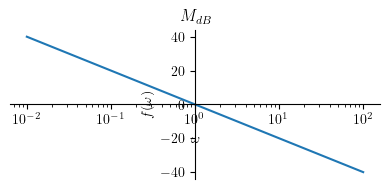

In [143]:
title = '$ M_{dB} $'
p1 = plot(Mdb1, (omega, 0.01 , 100), size=(4, 2), title=title, show=True,  xscale='log')

**Phase plot:**

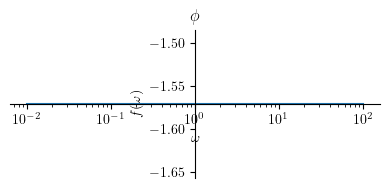

In [144]:
title = '$\\phi $'
p2 = plot(Phi1, (omega, 0.01 , 100), size=(4, 2), title=title, show=True,  xscale='log')

## Case 2: A zero at the origin of the s-plane

Let us start by first defining the transfer function:

In [145]:
H2 = s
mprint('H(s)=', latex(H2))

<IPython.core.display.Math object>

After the substitution, we then obtain:

In [146]:
Hjw  = H2.subs(s, I*omega)
M2   = simplify(Abs(Hjw))
Mdb2 = simplify(20 * log(M2, 10))
Phi2 = arg(Hjw)
mprintb("M  =", latex(M2))
mprintb("M_{dB} =", latex(Mdb2))
mprintb("\\phi =", latex(Phi2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Magnitude plot:**

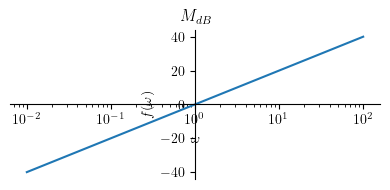

In [147]:
title = '$M_{dB}$'
p1 = plot(Mdb2, (omega, 0.01 , 100), size=(4, 2), title=title, show=True,  xscale='log')

**Phase plot:**

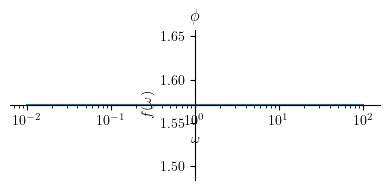

In [148]:
title = '$\\phi $'
p2 = plot(Phi2, (omega, 0.01 , 100), size=(4, 2), title=title, show=True,  xscale='log')

## Case 3: A single real pole

Let us start by first defining the transfer function:

In [149]:
H3 = 1/(s+a)
mprint('H(s)=', latex(H3))

<IPython.core.display.Math object>

After the substitution, we then obtain:

In [150]:
Hjw  = H3.subs(s, I*omega)
M3   = simplify(Abs(Hjw))
Mdb3 = simplify(20 * log(M3, 10))
Phi3 = arg(Hjw)
mprintb("M =", latex(M3))
mprintb("M_{dB} =", latex(Mdb3))
mprintb("\\phi =", latex(Phi3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, let us plot the results for both the magnitude and the phase. To do this, we must first set a numerical value for $a$. Let us set $a=1$. 

In [151]:
a_ = 1

Next, let us write down the approximated version of the plots, for the magnitude and the phase. What we do here is a bit based on observations.

**Magnitude plot:**

In [152]:
Mhatdb3 = Piecewise((-20 * log(a, 10),     omega <= a),
                    (-20 * log(omega, 10), True))
mprintb("\\hat{ M }_{dB} = ", latex(Mhatdb3))

<IPython.core.display.Math object>

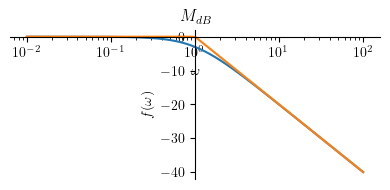

In [153]:
title = '$M_{dB}$'
p1 = plot(Mdb3.subs(a, a_),    (omega, a_/100 , 100*a_), size=(4, 2), title=title, show=False,  xscale='log')
p2 = plot(Mhatdb3.subs(a, a_), (omega, a_/100 , 100*a_), show=False)
p1.append(p2[0])
p1.show()

**Phase plot:**

In [154]:
Phihat3 = Piecewise((0, omega <= 0.1*a),
                    (-pi/4 * log(omega/(0.1*a), 10) , omega < a*10), 
                    (-pi/2, True))
mprintb("\\hat{ \\phi }  = ", latex(simplify(Phihat3)))

<IPython.core.display.Math object>

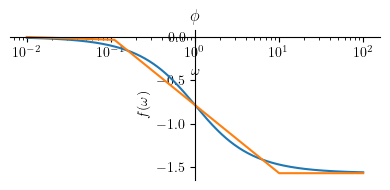

In [155]:
title = '$ \\phi $'
p1 = plot(Phi3.subs(a, a_),    (omega, a_/100 , 100*a_), size=(4, 2), title=title, show=False,  xscale='log')
p2 = plot(Phihat3.subs(a, a_), (omega, a_/100 , 100*a_), show=False)
p1.append(p2[0])
p1.show()

## Case 4: A single real zero

Let us start by first defining the transfer function:

In [156]:
H4 = s+a
mprint('H(s)=', latex(H4))

<IPython.core.display.Math object>

After the substitution, we then obtain:

In [157]:
Hjw  = H4.subs(s, I*omega)
M4   = simplify(Abs(Hjw))
Mdb4 = simplify(20 * log(M4, 10))
Phi4 = arg(Hjw)
mprint("M  =", latex(M4))
mprint("M_{dB} =", latex(Mdb4))
mprint("\\phi =", latex(Phi4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, let us plot the results for both the magnitude and the phase. To do this, we must first set a numerical value for $a$. Let us set $a=1$.

Next, let us write down the approximated version of the plots, for both the magnitude and the phase. What we do here is a bit based on observations. 

**Magnitude plot:**

In [158]:
Mhatdb4 = Piecewise((20 * log(a, 10), omega <= a),
                    (20 * log(omega, 10), True))
mprintb("\\hat{ M }_{dB} = ", latex(Mhatdb4))

<IPython.core.display.Math object>

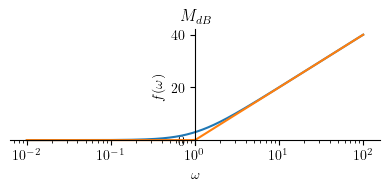

In [159]:
title = '$M_{dB}$'
p1 = plot(Mdb4.subs(a, a_),    (omega, a_/100 , 100*a_), size=(4, 2), title=title, show=False,  xscale='log')
p2 = plot(Mhatdb4.subs(a, a_), (omega, a_/100 , 100*a_), show=False)
p1.append(p2[0])
p1.show()

**Phase plot:**

In [160]:
Phihat4 = Piecewise((0, omega <= 0.1*a),
                    (pi/4 * log(omega/(0.1*a), 10) , omega < a*10), 
                    (pi/2, True))
mprintb("\\hat{ \\phi } = ", latex(simplify(Phihat4)))

<IPython.core.display.Math object>

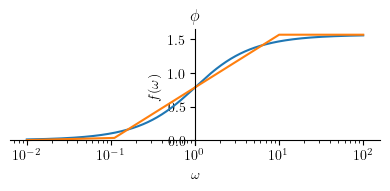

In [161]:
title = '$ \\phi $'
p1 = plot(Phi4.subs(a, a_),    (omega, a_/100 , 100*a_), size=(4, 2), title=title, show=False,  xscale='log')
p2 = plot(Phihat4.subs(a, a_), (omega, a_/100 , 100*a_), show=False)
p1.append(p2[0])
p1.show()

## Case 5: Complex Conjugate Pole Pair

Let us start by first defining the transfer function:

In [162]:
H5 = 1 / (s**2 + 2*zeta*omega_n*s + omega_n**2)
mprint('H(s)=', latex(H5))

<IPython.core.display.Math object>

By substituting $s$ with $j \omega$, we can obtain:

In [163]:
Hjw  = H5.subs(s, I*omega)
M5   = simplify(Abs(Hjw))
Mdb5 = expand_log(20 * log(M5, 10))
Phi5 = arg(Hjw)
mprint("M =", latex(M5))
mprint("M_{dB} =", latex(Mdb5))
mprint("\\phi =", latex(Phi5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Resonance peak:**

* Complex conjugate pole pair occurs when $\zeta < 1$.

* When $\zeta < 1$, the system becomes underdamped and resonace peak appears in the magnitude plot.

* Resonance peak appears at $\omega_p$ and its peak magnitude is $M_p$.

In [164]:
omega_p5 = solve(Eq(diff(M5, omega), 0), omega)
mprintb("\\omega_p=", latex(omega_p5[0]))

<IPython.core.display.Math object>

In [165]:
Mp5 = simplify(M5.subs(omega, omega_p5[0]))
Mdbp5 =simplify(Mdb5.subs(omega, omega_p5[0]))
mprintb("M_p = ", latex(Mp5))
mprintb("M_{p(dB)} = ", latex(Mdbp5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, let's express the asymptotic Bode plot as piecewise functions. At the moment, we will do this by intuition.

In [166]:
Mhatdb5 = Piecewise((-40 * log(omega_n, 10), omega <= omega_n),
                    (-40 * log(omega, 10), omega > omega_n))
mprintb("\\hat{ M }_{dB} ( \\omega ) = ", latex(Mhatdb5))

<IPython.core.display.Math object>

**Magnitude plot:**

For plotting, we need to define some numerical values for:

In [167]:
omega_n_ = 1
zeta_ = [0.1, 0.2, 0.5] # plot for several values

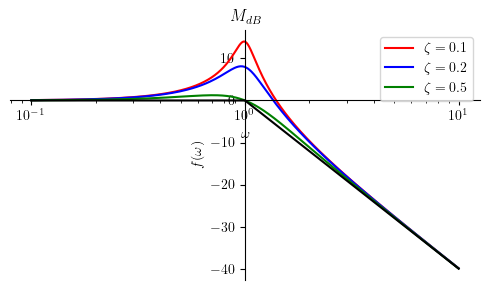

In [168]:
title = '$ M_{dB} $'
p1 = plot(Mdb5.subs(([omega_n, omega_n_],[zeta, zeta_[0]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='r', size=(5, 3), title=title, show=False,  xscale='log', legend=True)
p2 = plot(Mdb5.subs(([omega_n, omega_n_],[zeta, zeta_[1]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='b', show=False)
p3 = plot(Mdb5.subs(([omega_n, omega_n_],[zeta, zeta_[2]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='g', show=False)
p4 = plot(Mhatdb5.subs(([omega_n, omega_n_],[zeta, zeta_[0]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)

p1[0].label = "$\\zeta=" + str(zeta_[0]) + "$"
p2[0].label = "$\\zeta=" + str(zeta_[1]) + "$"
p3[0].label = "$\\zeta=" + str(zeta_[2]) + "$"
p4[0].label = ""

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])

p1.show()

The general shape of the asymptotic magnitude plot is not affected by $\zeta$.
 
We are not going to include the resonance peak for the asymptotic plots. However, we can still compute this peak value by using the equation expressed by $M_{p(dB)}$:

In [169]:
print(Mdbp5.subs(([omega_n, omega_n_],[zeta, zeta_[0]])).evalf()) # for zeta[0]
print(Mdbp5.subs(([omega_n, omega_n_],[zeta, zeta_[1]])).evalf()) # for zeta[1]
print(Mdbp5.subs(([omega_n, omega_n_],[zeta, zeta_[2]])).evalf()) # for zeta[2]

14.0230481407449
8.13608784304507
1.24938736608300


Resonance peak happens at $\omega = \omega_{p}$:

In [170]:
print(omega_p5[0].subs(([omega_n, omega_n_],[zeta, zeta_[0]])).evalf())

0.989949493661167


**Phase plot:**

In [171]:
Phihat5 = Piecewise((0, omega <= (omega_n / 10**zeta)),
                    (-pi/(2*zeta) * log(omega/(10**(-zeta)*omega_n), 10) , omega < (omega_n*10**zeta)), 
                    (-pi, True))
mprintb("\\hat{ \\phi } ( \\omega ) = ", latex(Phihat5))

<IPython.core.display.Math object>

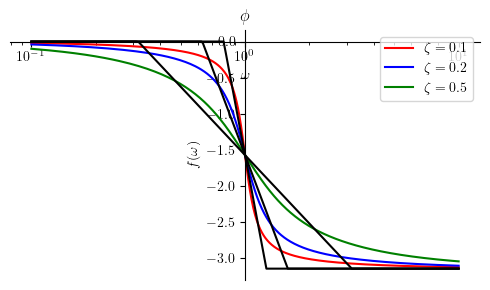

In [172]:
title = '$ \\phi $'
p1 = plot(Phi5.subs(([omega_n, omega_n_],[zeta, zeta_[0]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='r', size=(5, 3), title=title, show=False,  xscale='log', legend=True)
p2 = plot(Phi5.subs(([omega_n, omega_n_],[zeta, zeta_[1]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='b', show=False)
p3 = plot(Phi5.subs(([omega_n, omega_n_],[zeta, zeta_[2]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='g', show=False)

p4 = plot(Phihat5.subs(([omega_n, omega_n_],[zeta, zeta_[0]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)
p5 = plot(Phihat5.subs(([omega_n, omega_n_],[zeta, zeta_[1]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)
p6 = plot(Phihat5.subs(([omega_n, omega_n_],[zeta, zeta_[2]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)


p1[0].label = "$\\zeta=" + str(zeta_[0]) + "$"
p2[0].label = "$\\zeta=" + str(zeta_[1]) + "$"
p3[0].label = "$\\zeta=" + str(zeta_[2]) + "$"
p4[0].label = ""
p5[0].label = ""
p6[0].label = ""

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.append(p5[0])
p1.append(p6[0])

p1.show()

## Case 6: Complex Conjugate Zero Pair

Let us start by first defining the transfer function:

In [173]:
H6 = (s**2 + 2*zeta*omega_n*s + omega_n**2) 
mprint('H(s)=', latex(H6))

<IPython.core.display.Math object>

In [174]:
Hjw  = H6.subs(s, I*omega)
M6   = simplify(Abs(Hjw))
Mdb6 = simplify(20 * log(M6, 10))
Phi6 = arg(Hjw)
mprint("M  =", latex(M6))
mprint("M_{dB}  =", latex(Mdb6))
mprint("\\phi  =", latex(Phi6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Resonance peak:**

Complex conjugate zero pair occurs when $\zeta < 1$. Resonance peak appears in the Bode magnitude plot at $\omega = \omega_n$. The magnitude at this resonance peak can be computed as: 

In [175]:
omega_p6 = solve(Eq(diff(M6, omega), 0), omega)
mprintb("\\omega_p=", latex(omega_p6[0]))

<IPython.core.display.Math object>

In [176]:
Mp6 = simplify(M6.subs(omega, omega_p6[0]))
Mdbp6 =simplify(Mdb6.subs(omega, omega_p6[0]))
mprintb("M_p = ", latex(Mp6))
mprintb("M_{p(dB)} = ", latex(Mdbp6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Magnitude plot:**

We first present the piecewise logarithmic representation of the asymptotic Bode plot. After that, we present the plot for several diffrent values for $\zeta$.

In [177]:
Mhatdb6 = Piecewise((40 * log(omega_n, 10), omega < omega_n),
                    (40 * log(omega, 10), omega >= omega_n))
mprintb("\\hat{ M } ( \\omega ) = ", latex(Mhatdb6))

<IPython.core.display.Math object>

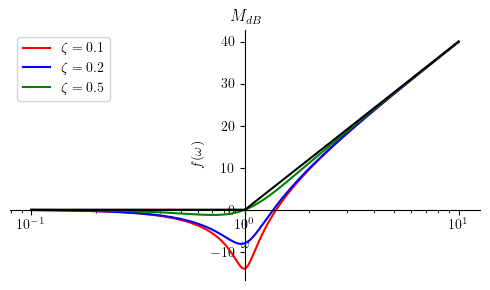

In [178]:
title = '$ M_{dB} $'
p1 = plot(Mdb6.subs(([omega_n, omega_n_],[zeta, zeta_[0]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='r', size=(5, 3), title=title, show=False,  xscale='log', legend=True)
p2 = plot(Mdb6.subs(([omega_n, omega_n_],[zeta, zeta_[1]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='b', show=False)
p3 = plot(Mdb6.subs(([omega_n, omega_n_],[zeta, zeta_[2]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='g', show=False)
p4 = plot(Mhatdb6.subs(([omega_n, omega_n_],[zeta, zeta_[0]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)

p1[0].label = "$\\zeta=" + str(zeta_[0]) + "$"
p2[0].label = "$\\zeta=" + str(zeta_[1]) + "$"
p3[0].label = "$\\zeta=" + str(zeta_[2]) + "$"
p4[0].label = ""

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])

p1.show()

The general shape of the asymptotic magnitude plot is not affected by $\zeta$.
 
We are not going to include the resonance peak for the asymptotic plots. However, we can still compute this peak value by using the equation expressed by $M_{p(dB)}$:

In [179]:
print(Mdbp6.subs(([omega_n, omega_n_],[zeta, zeta_[0]])).evalf()) # for zeta[0]
print(Mdbp6.subs(([omega_n, omega_n_],[zeta, zeta_[1]])).evalf()) # for zeta[1]
print(Mdbp6.subs(([omega_n, omega_n_],[zeta, zeta_[2]])).evalf()) # for zeta[2]

-14.0230481407449
-8.13608784304507
-1.24938736608300


Resonance peak happens at $\omega = \omega_{p}$:

In [180]:
print(omega_p6[0].subs(([omega_n, omega_n_],[zeta, zeta_[0]])).evalf())

0.989949493661167


**Phase plot:**

Similar to the prevoius section, we first present the piecewise logarithmic representation of the asymptotic Bode plot. After that, we present the plot for several diffrent values for $\zeta$.

In [181]:
Phihat6 = Piecewise((0, omega <= (omega_n / 10**zeta)),
                    (pi/(2*zeta) * log(omega/(10**(-zeta)*omega_n), 10) , omega < (omega_n*10**zeta)), 
                    (pi, True))
mprintb("\\hat{ \\phi } ( \\omega ) = ", latex(Phihat6))

<IPython.core.display.Math object>

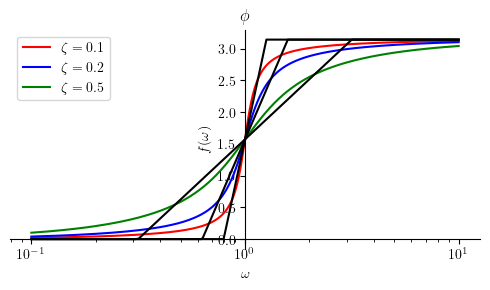

In [182]:
title = '$ \\phi $'
p1 = plot(Phi6.subs(([omega_n, omega_n_],[zeta, zeta_[0]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='r', size=(5, 3), title=title, show=False,  xscale='log', legend=True)
p2 = plot(Phi6.subs(([omega_n, omega_n_],[zeta, zeta_[1]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='b', show=False)
p3 = plot(Phi6.subs(([omega_n, omega_n_],[zeta, zeta_[2]])),    (omega, omega_n_/10 , 10*omega_n_), line_color='g', show=False)

p4 = plot(Phihat6.subs(([omega_n, omega_n_],[zeta, zeta_[0]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)
p5 = plot(Phihat6.subs(([omega_n, omega_n_],[zeta, zeta_[1]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)
p6 = plot(Phihat6.subs(([omega_n, omega_n_],[zeta, zeta_[2]])), (omega, omega_n_/10 , 10*omega_n_), line_color='k', show=False)

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.append(p5[0])
p1.append(p6[0])

p1[0].label = "$\\zeta=" + str(zeta_[0]) + "$"
p2[0].label = "$\\zeta=" + str(zeta_[1]) + "$"
p3[0].label = "$\\zeta=" + str(zeta_[2]) + "$"
p4[0].label = ""
p5[0].label = ""
p6[0].label = ""


p1.show()

## Summary

Finally, let us summarize all boxed formulas.

### Asymptotic Bode as piecewise functions

The following table shows piecewise approximations of a Bode plot.

In [183]:
from pandas import DataFrame
from IPython.display import Markdown

def makelatex(args):
    return ["${}$".format(latex(a)) for a in args]

Hs   = [H1, H2, H3, H4, H5, H6]
Mdbs = [Mdb1, Mdb2, Mhatdb3, Mhatdb4, Mhatdb5, Mhatdb6]
Phis = [Phi1, Phi2, Phihat3, Phihat4, Phihat5, Phihat6]

dic = {'$ H(s) $': makelatex(Hs), 
       '$ M_{dB} $': makelatex(Mdbs), 
       '$ \\phi $': makelatex(Phis)}

df = DataFrame(dic)
Markdown(df.to_markdown(index=False))

| $ H(s) $                                                  | $ M_{dB} $                                                                                                                                                                                                               | $ \phi $                                                                                                                                                                                                                                                          |
|:----------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $\frac{1}{s}$                                             | $- \frac{20 \log{\left(\omega \right)}}{\log{\left(10 \right)}}$                                                                                                                                                         | $- \frac{\pi}{2}$                                                                                                                                                                                                                                                 |
| $s$                                                       | $\frac{20 \log{\left(\omega \right)}}{\log{\left(10 \right)}}$                                                                                                                                                           | $\frac{\pi}{2}$                                                                                                                                                                                                                                                   |
| $\frac{1}{a + s}$                                         | $\begin{cases} - \frac{20 \log{\left(a \right)}}{\log{\left(10 \right)}} & \text{for}\: a \geq \omega \\- \frac{20 \log{\left(\omega \right)}}{\log{\left(10 \right)}} & \text{otherwise} \end{cases}$                   | $\begin{cases} 0 & \text{for}\: \omega \leq 0.1 a \\- \frac{\pi \log{\left(\frac{10.0 \omega}{a} \right)}}{4 \log{\left(10 \right)}} & \text{for}\: \omega < 10 a \\- \frac{\pi}{2} & \text{otherwise} \end{cases}$                                               |
| $a + s$                                                   | $\begin{cases} \frac{20 \log{\left(a \right)}}{\log{\left(10 \right)}} & \text{for}\: a \geq \omega \\\frac{20 \log{\left(\omega \right)}}{\log{\left(10 \right)}} & \text{otherwise} \end{cases}$                       | $\begin{cases} 0 & \text{for}\: \omega \leq 0.1 a \\\frac{\pi \log{\left(\frac{10.0 \omega}{a} \right)}}{4 \log{\left(10 \right)}} & \text{for}\: \omega < 10 a \\\frac{\pi}{2} & \text{otherwise} \end{cases}$                                                   |
| $\frac{1}{\omega_{n}^{2} + 2 \omega_{n} s \zeta + s^{2}}$ | $\begin{cases} - \frac{40 \log{\left(\omega_{n} \right)}}{\log{\left(10 \right)}} & \text{for}\: \omega \leq \omega_{n} \\- \frac{40 \log{\left(\omega \right)}}{\log{\left(10 \right)}} & \text{otherwise} \end{cases}$ | $\begin{cases} 0 & \text{for}\: \omega \leq 10^{- \zeta} \omega_{n} \\- \frac{\pi \log{\left(\frac{10^{\zeta} \omega}{\omega_{n}} \right)}}{2 \zeta \log{\left(10 \right)}} & \text{for}\: \omega < 10^{\zeta} \omega_{n} \\- \pi & \text{otherwise} \end{cases}$ |
| $\omega_{n}^{2} + 2 \omega_{n} s \zeta + s^{2}$           | $\begin{cases} \frac{40 \log{\left(\omega_{n} \right)}}{\log{\left(10 \right)}} & \text{for}\: \omega < \omega_{n} \\\frac{40 \log{\left(\omega \right)}}{\log{\left(10 \right)}} & \text{otherwise} \end{cases}$        | $\begin{cases} 0 & \text{for}\: \omega \leq 10^{- \zeta} \omega_{n} \\\frac{\pi \log{\left(\frac{10^{\zeta} \omega}{\omega_{n}} \right)}}{2 \zeta \log{\left(10 \right)}} & \text{for}\: \omega < 10^{\zeta} \omega_{n} \\\pi & \text{otherwise} \end{cases}$     |

### Resonance peaks

The following table summarizes when a resonance occurs  and its peak value.

In [184]:
Hs   = [H5, H6]
wp   = [omega_p5[0], omega_p6[0]]
Mp   = [Mp5, Mp6]
Mpdb = [Mdbp5, Mdbp6]

dic = {'$H(s)$': makelatex(Hs), 
       '$ \\omega_p $': makelatex(wp), 
       '$ M_p $': makelatex(Mp),
       '$ M_{p(dB)} $': makelatex(Mpdb)}

df = DataFrame(dic)

Markdown(df.to_markdown(index=False))

| $H(s)$                                                    | $ \omega_p $                        | $ M_p $                                                 | $ M_{p(dB)} $                                                                                                     |
|:----------------------------------------------------------|:------------------------------------|:--------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------|
| $\frac{1}{\omega_{n}^{2} + 2 \omega_{n} s \zeta + s^{2}}$ | $\omega_{n} \sqrt{1 - 2 \zeta^{2}}$ | $\frac{1}{2 \omega_{n}^{2} \zeta \sqrt{1 - \zeta^{2}}}$ | $- \frac{10 \log{\left(- 4 \omega_{n}^{4} \zeta^{2} \left(\zeta^{2} - 1\right) \right)}}{\log{\left(10 \right)}}$ |
| $\omega_{n}^{2} + 2 \omega_{n} s \zeta + s^{2}$           | $\omega_{n} \sqrt{1 - 2 \zeta^{2}}$ | $2 \omega_{n}^{2} \zeta \sqrt{1 - \zeta^{2}}$           | $\frac{10 \log{\left(4 \omega_{n}^{4} \zeta^{2} \left(1 - \zeta^{2}\right) \right)}}{\log{\left(10 \right)}}$     |